In [159]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from matplotlib import cm as CM
import numpy as NP

In [115]:
tokens = pd.read_csv (r'Traits.csv')
sales = pd.read_csv (r'Sales.csv')

In [116]:
tokens

,Unnamed: 0,collection,contract,token_id,nft_url,trait_type,value
0,0,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Type,Human
1,1,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Hair,Water
2,2,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Clothing,Pink Oversized Kimono
3,3,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Eyes,Striking
4,4,azuki,0xed5af388653567af2f388e6224dc7c4b3241c544,0,https://ikzttp.mypinata.cloud/ipfs/QmQFkLSQysj...,Mouth,Frown
...,...,...,...,...,...,...,...
696003,44435,pudgy_penguins,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,8887,https://ipfs.io/ipfs/QmWXJXRdExse2YHRY21Wvh4pj...,Background,Blue
696004,44436,pudgy_penguins,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,8887,https://ipfs.io/ipfs/QmWXJXRdExse2YHRY21Wvh4pj...,Skin,Olive Green
696005,44437,pudgy_penguins,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,8887,https://ipfs.io/ipfs/QmWXJXRdExse2YHRY21Wvh4pj...,Body,Puffer Green
696006,44438,pudgy_penguins,0xbd3531da5cf5857e7cfaa92426877b022e612cf8,8887,https://ipfs.io/ipfs/QmWXJXRdExse2YHRY21Wvh4pj...,Face,Handlebar Bear


In [117]:
print(pd.unique(tokens['token_id']))
print(tokens.groupby('collection')['token_id'].nunique())

[    0     1     2 ... 19997 19999 20000]
collection
BAYC              10000
MAYC              18502
azuki             10000
clone_x           18895
cool_cats          9933
doodles           10000
meebits           20000
pudgy_penguins     8888
Name: token_id, dtype: int64


In [118]:
grouped_tokens = tokens.groupby('collection')
bayc = grouped_tokens.get_group('BAYC')
mayc = grouped_tokens.get_group('MAYC')
azuki = grouped_tokens.get_group('azuki')
clone_x = grouped_tokens.get_group('clone_x')
cool_cats = grouped_tokens.get_group('cool_cats')
doodles = grouped_tokens.get_group('doodles')
meebits = grouped_tokens.get_group('meebits')
pudgy_penguins = grouped_tokens.get_group('pudgy_penguins')

In [144]:
grouped_sales = sales.groupby('tokenSymbol')
bayc_sales = grouped_sales.get_group('BAYC')
mayc_sales = grouped_sales.get_group('MAYC')
azuki_sales = grouped_sales.get_group('AZUKI')
clone_x_sales = grouped_sales.get_group('CloneX')
cool_cats_sales = grouped_sales.get_group('COOL')
doodles_sales = grouped_sales.get_group('DOODLE')
meebits_sales = grouped_sales.get_group('⚇')
pudgy_penguins_sales = grouped_sales.get_group('PPG')

In [120]:
bayc
print(bayc.groupby('trait_type')['token_id'].nunique())
print(bayc.groupby('trait_type')['value'].nunique())
print(pd.unique(bayc.groupby('trait_type').get_group('Background')['value']))
print(bayc.groupby('trait_type').get_group('Background')['value'].value_counts()/10000)

trait_type
Background    10000
Clothes        8114
Earring        2977
Eyes          10000
Fur           10000
Hat            7744
Mouth         10000
Name: token_id, dtype: int64
trait_type
Background     8
Clothes       43
Earring        6
Eyes          23
Fur           19
Hat           36
Mouth         33
Name: value, dtype: int64
['Orange' 'Aquamarine' 'Purple' 'Blue' 'Army Green' 'Yellow' 'Gray'
 'New Punk Blue']
Purple           0.1291
Yellow           0.1283
Orange           0.1273
Aquamarine       0.1266
Army Green       0.1243
Blue             0.1242
New Punk Blue    0.1232
Gray             0.1170
Name: value, dtype: float64


In [121]:
sales[sales['amount'] != 0]

,blockNumber,timeStamp,hash,from,contractAddress,to,tokenID,tokenName,tokenSymbol,gasPrice,currency,amount,amountUsd
200,13992202,1642010411,0xe3034e18aa6fa00ac39ffb6904baf9570cc31c1716c5...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xdec08cb92a506b88411da9ba290f3694be223c26,200,Azuki,AZUKI,619374837712,ETH,1.000000,3384.137681
201,13992202,1642010411,0xe3034e18aa6fa00ac39ffb6904baf9570cc31c1716c5...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xdec08cb92a506b88411da9ba290f3694be223c26,201,Azuki,AZUKI,619374837712,ETH,1.000000,3384.137681
202,13992202,1642010411,0xe3034e18aa6fa00ac39ffb6904baf9570cc31c1716c5...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xdec08cb92a506b88411da9ba290f3694be223c26,202,Azuki,AZUKI,619374837712,ETH,1.000000,3384.137681
203,13992202,1642010411,0xe3034e18aa6fa00ac39ffb6904baf9570cc31c1716c5...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xdec08cb92a506b88411da9ba290f3694be223c26,203,Azuki,AZUKI,619374837712,ETH,1.000000,3384.137681
204,13992202,1642010411,0xe3034e18aa6fa00ac39ffb6904baf9570cc31c1716c5...,0x0000000000000000000000000000000000000000,0xed5af388653567af2f388e6224dc7c4b3241c544,0xdec08cb92a506b88411da9ba290f3694be223c26,204,Azuki,AZUKI,619374837712,ETH,1.000000,3384.137681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,14471743,1648430919,0xb362fed9aece8fa0ce819778062ddbb05533a68a6401...,0x88341d1a8f672d2780c8dc725902aae72f143b0c,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,0xf6a325cef74fb60a685bdd5a79ded1ffe45996e8,550,CloneX,CloneX,23623743142,ETH,5.745767,18978.246953
431368,14471918,1648433160,0xcf8b9cf7a66f81ca0ca7648e4afa9183f171fb286bd8...,0xf6a325cef74fb60a685bdd5a79ded1ffe45996e8,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,0x88341d1a8f672d2780c8dc725902aae72f143b0c,550,CloneX,CloneX,25970855725,ETH,11.000000,36254.122921
431378,14472353,1648438868,0xb7e933b307f2aee8795311d6226e3f656aeee5d0683a...,0x23324ed44904260fe555b18e5ba95c6030b9227d,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,0xac7ebc289354503e1ddda06f30e75ca688382051,11018,CloneX,CloneX,38783642325,ETH,14.990000,49689.068827
431396,14473259,1648451159,0x695045f3093a9ee40769135159118f1fc2bd603a22a7...,0x24415add68ea0d8c6efa9ff6e4ca213417969d38,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,0x2310abf1ef6beb30b74bff98ac1b326b647f4224,911,CloneX,CloneX,23543438533,ETH,16.000000,53186.027771


In [122]:
print(sales.groupby('tokenSymbol')['tokenID'].nunique())

tokenSymbol
AZUKI     10000
BAYC      10000
COOL       9938
CloneX    18554
DOODLE     9784
MAYC      17990
PPG        8887
⚇         19999
Name: tokenID, dtype: int64


In [123]:
bayc_features = bayc.groupby('token_id')#.filter('trait_type')
print(bayc_features)

In [124]:
def get_features(df):
    """
    :param df: dataframe to have features extracted
    :return: dataframe with rows of token id and columns of features
    """
    columns = {}

    for trait in df['trait_type'].unique():
        columns[trait] = ['None' for i in range(df.token_id.nunique())]

    for id in df['token_id'].unique():
        for _, row in df[df.token_id == id].iterrows():
                columns[row.trait_type][id] = row.value
    #%%

    return pd.DataFrame(columns)

In [125]:
bayc_features = get_features(bayc)
print(bayc_features)
pd.get_dummies(bayc_features).describe()

          Earring     Background           Fur           Clothes  \
0     Silver Hoop         Orange         Robot       Striped Tee   
1            None         Orange         Robot    Vietnam Jacket   
2            None     Aquamarine         Robot              None   
3            None         Purple       Cheetah     Bone Necklace   
4            None           Blue  Golden Brown  Navy Striped Tee   
...           ...            ...           ...               ...   
9995         None           Gray          Pink    Smoking Jacket   
9996  Silver Hoop  New Punk Blue    Dark Brown         Guayabera   
9997         None         Purple         Black      Sailor Shirt   
9998         None         Yellow         Brown        Bayc T Red   
9999    Gold Hoop         Purple          Gray              None   

                         Mouth        Eyes                Hat  
0                   Discomfort      X Eyes               None  
1                         Grin  Blue Beams             

,Earring_Cross,Earring_Diamond Stud,Earring_Gold Hoop,Earring_Gold Stud,Earring_None,Earring_Silver Hoop,Earring_Silver Stud,Background_Aquamarine,Background_Army Green,Background_Blue,...,Hat_Safari,Hat_Sea Captain's Hat,Hat_Seaman's Hat,Hat_Short Mohawk,Hat_Spinner Hat,Hat_Stuntman Helmet,Hat_Sushi Chef Headband,Hat_Trippy Captain's Hat,Hat_Vietnam Era Helmet,Hat_Ww2 Pilot Helm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.014900,0.022200,0.046200,0.043900,0.70230,0.0882,0.082300,0.126600,0.12430,0.124200,...,0.018200,0.030400,0.042000,0.031800,0.01810,0.015700,0.01870,0.006500,0.022300,0.011000
std,0.121159,0.147341,0.209928,0.204883,0.45727,0.2836,0.274835,0.332541,0.32994,0.329826,...,0.133681,0.171694,0.200599,0.175476,0.13332,0.124318,0.13547,0.080364,0.147665,0.104308
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.00000,0.0000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.00000,0.0000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.0000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000


In [134]:
one_hot_bayc = pd.get_dummies(bayc_features)
def gmm(one_hot_bayc, test):
    Sum_of_squared_distances = []
    for k in tqdm(range (1, 100, 20)):
        gmm = GaussianMixture(k).fit(one_hot_bayc)
        Sum_of_squared_distances.append(gmm.bic(test))
        # print('Progresss: ', k, "%")
    # return Sum_of_squared_distances
    plt.plot(range (1, 100, 20), Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('BIC')
    plt.title('Elbow Method For Optimal k')
    plt.savefig('gmm.png')
    plt.show()

def kmeans(one_hot_bayc=one_hot_bayc):
    Sum_of_squared_distances = []
    for k in range (1, 1000, 100):
        kmeans = MiniBatchKMeans(n_clusters=k, batch_size=2048).fit(one_hot_bayc)
        Sum_of_squared_distances.append(kmeans.inertia_)
    # gmm = GaussianMixture(100).fit(pd.get_dummies(bayc_features))
    plt.plot(range (1, 1000, 100), Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.savefig('kmeans.png')
    plt.show()

In [ ]:
kmeans()

Progresss:  1 %
Progresss:  21 %
Progresss:  41 %
Progresss:  61 %
Progresss:  81 %


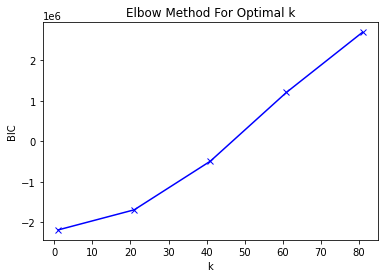

In [128]:
gmm()

In [180]:
def process_sales(df):
    df = df[df.amount != 0]
    df = df[df.amount < 1e3]
    return df

In [132]:
train, test = train_test_split(one_hot_bayc, test_size=0.2)


  0%|          | 0/5 [00:00<?, ?it/s]

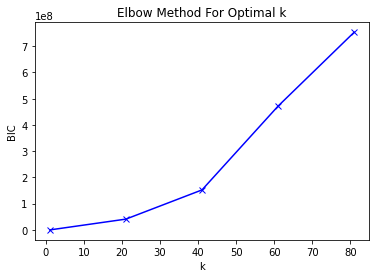

In [135]:
gmm(train, test)

In [136]:
test

,Earring_Cross,Earring_Diamond Stud,Earring_Gold Hoop,Earring_Gold Stud,Earring_None,Earring_Silver Hoop,Earring_Silver Stud,Background_Aquamarine,Background_Army Green,Background_Blue,...,Hat_Safari,Hat_Sea Captain's Hat,Hat_Seaman's Hat,Hat_Short Mohawk,Hat_Spinner Hat,Hat_Stuntman Helmet,Hat_Sushi Chef Headband,Hat_Trippy Captain's Hat,Hat_Vietnam Era Helmet,Hat_Ww2 Pilot Helm
6064,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4179,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2504,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9447,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8551,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9743,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
591,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


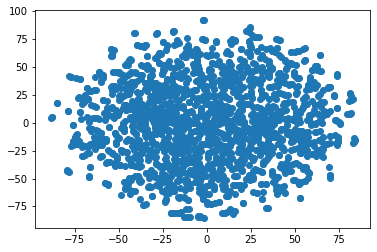

In [143]:
tsne = TSNE(perplexity=5)
transform = tsne.fit_transform(test)
plt.scatter(transform.T[0], transform.T[1])

In [140]:
transform[0]

array([-27.180027,  63.90828 ], dtype=float32)

In [181]:
bayc_sales_processed = process_sales(bayc_sales)
token_ids = bayc_sales_processed['tokenID'].unique()
prices = bayc_sales_processed.groupby('tokenID')['amount'].mean()
prices.describe()

count    9985.000000
mean       11.175277
std        17.929785
min         0.022500
25%         0.340000
50%         2.705790
75%        17.424000
max       311.270000
Name: amount, dtype: float64

In [182]:
tsne = TSNE(perplexity=5)
transform = tsne.fit_transform(pd.get_dummies(bayc_features.iloc[token_ids]))

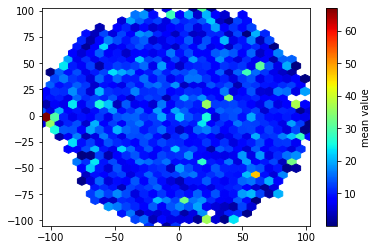

In [183]:
X, Y = NP.meshgrid(transform.T[0], transform.T[1])
x = X.ravel()
y = Y.ravel()
z = prices.ravel()
gridsize=30
plt.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then
# the result is a pure 2D histogram

plt.hexbin(transform.T[0], transform.T[1], C=prices, gridsize=gridsize, cmap=CM.jet, bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()